In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from specgen import spectrum_PM, spectrum_gen_linear, eta_random

## Generate kx-ky spectrum from a given unidirectional spectrum shape
We demonstrate with the PM spectrum shape

In [2]:
''' Wrap the function around so that it only takes in kmod as an argument 
    This is a 200 meter box case '''

P = 0.02          # energy level (estimated so that kpHs is reasonable)
L = 200           # domain size
kp = 2*np.pi/40   # peak wavenumber
N_mode = 32       # number of nodes
N_power = 5       # directional spreading coeff

def shape (kmod):
    ''' Choose values here '''
    global P, kp
    F_kmod = spectrum_PM (P=P, kp=kp, kmod=kmod)
    return F_kmod

kmod, F_kmod, kx, ky, F_kxky_tile = spectrum_gen_linear(shape, N_mode=N_mode, L=L, N_power=N_power)

In [5]:
''' Generate a grid in x-y to visualize random eta '''
N_grid = 256; L = 200
x = np.linspace(-L/2,L/2,N_grid); y = np.linspace(-L/2,L/2,N_grid)
x_tile, y_tile = np.meshgrid(x, y)
kx_tile, ky_tile = np.meshgrid(kx,ky)
t = 0
eta_tile, phase_tile = eta_random(t, kx_tile, ky_tile, F_kxky_tile, x_tile, y_tile)
print('kpHs = %g' %(kp*np.std(eta_tile)*4))

kpHs = 0.246708


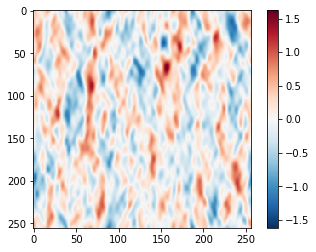

In [11]:
''' Visualization '''
plt.imshow(eta_tile, cmap='RdBu_r', vmax=eta_tile.max(), vmin=-eta_tile.max())
plt.colorbar(); plt.show()

In [16]:
''' When happy, output the spectra '''
print('Spectrum array shape:', F_kxky_tile.shape)
path = "/projects/DEIKE/jiarongw/multilayer/" # path of choice
file = "F_kxky_P%g_200m_N%g" %(P,N_power)
print('Written to', path+file)
fF = open(path + file, 'bw')
F_output = F_kxky_tile.astype('float32'); F_output.tofile(fF)

Spectrum array shape: (33, 32)
Written to /projects/DEIKE/jiarongw/multilayer/F_kxky_P0.02_200m_N5


In [ ]:
''' This is a 0.5 meter box case '''
kp = 2*np.pi/0.1 
P = 0.0012
L = 0.5
N_mode = 32       
N_power = 5    

''' This is a 500 meter box case '''
kp = 2*np.pi/100 
P = 0.08
L = 0.5
N_mode = 32      
N_power = 5      

## Generate kx-ky spectrum from a given directional spectrum
Todo: add the case that I generated the mixed-wind-sea-swell spectrum from WW3 output